In [3]:
import re
import itertools
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
from tabulate import tabulate

## Fuzzificação

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


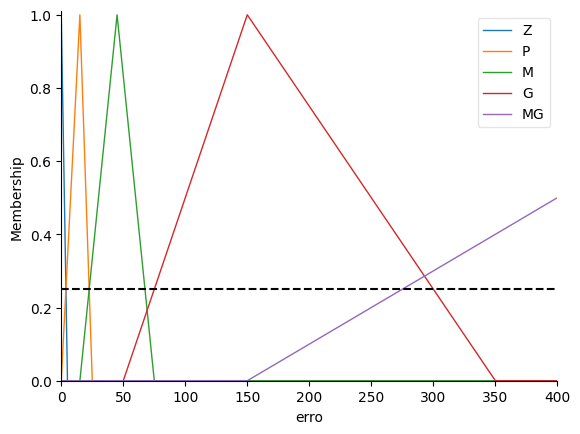

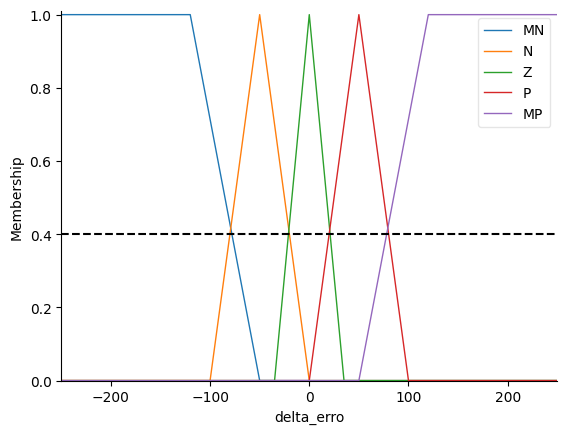

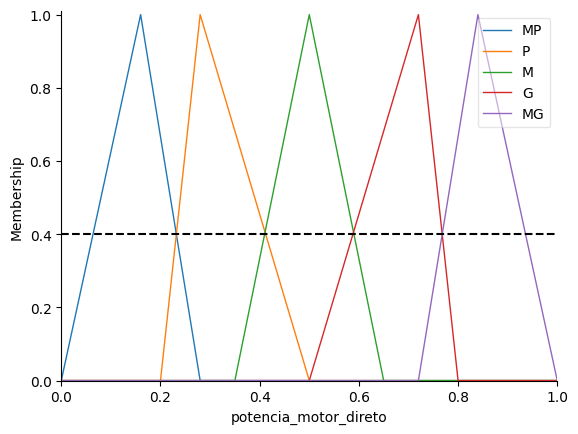

In [ ]:
# Definindo os universos para as variáveis de entrada e saída
erro = ctrl.Antecedent(np.arange(0, 1000.1, 0.1), 'erro')
delta_erro = ctrl.Antecedent(np.arange(-1000, 1000.5, 0.5), 'delta_erro')
potencia_motor = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'potencia_motor_direto')


# Definindo funções de pertinência para o erro
erro['Z'] = fuzz.trimf(erro.universe, [0, 0, 5])
erro['P'] = fuzz.trimf(erro.universe, [0, 15, 25])
erro['M'] = fuzz.trimf(erro.universe, [15, 45, 75])
erro['G'] = fuzz.trimf(erro.universe, [50, 150, 350])
erro['MG'] = fuzz.trimf(erro.universe, [150, 650, 1000]) # muito longe + descendo muito, - contrario

# Definindo funções de pertinência para delta_erro
delta_erro['MN'] = fuzz.trapmf(delta_erro.universe, [-1000, -1000, -120, -50])
delta_erro['N'] = fuzz.trimf(delta_erro.universe, [-100, -50, 0])
delta_erro['Z'] = fuzz.trimf(delta_erro.universe, [-35, 0, 35])
delta_erro['P'] = fuzz.trimf(delta_erro.universe, [0, 50, 100])
delta_erro['MP'] = fuzz.trapmf(delta_erro.universe, [50, 120, 1000, 1000])


# Definindo funções de pertinência para potencia_motor_direto e potencia_motor_reverso
potencia_motor['MP'] = fuzz.trimf(potencia_motor.universe, [0, 0.16, 0.28])
potencia_motor['P'] = fuzz.trimf(potencia_motor.universe, [0.2, 0.28, 0.5])
potencia_motor['M'] = fuzz.trimf(potencia_motor.universe, [0.35, 0.5, 0.65])
potencia_motor['G'] = fuzz.trimf(potencia_motor.universe, [0.5, 0.72, 0.8])
potencia_motor['MG'] = fuzz.trimf(potencia_motor.universe, [0.72, 0.84, 1])

erro.view()
plt.axline((0, 0.25), (1000, 0.25), color='black', linestyle='--')
plt.xlim(0, 400)

delta_erro.view()
plt.axline((0, 0.4), (1000, 0.4), color='black', linestyle='--')
plt.xlim(-250, 250)

potencia_motor.view()
plt.axline((0, 0.4), (1000, 0.4), color='black', linestyle='--')


## Base de Regras

In [ ]:
# Criação das regras para o controle

result_potencia = [
    
]

BaseRegras = [
    ctrl.Rule(erro[Erro] & delta_erro[Delta_erro], aceleracao[Aceleracao])
    for (Erro, Delta_erro), Aceleracao in
    zip(itertools.product(erro.terms.keys(), delta_erro.terms.keys()), result_aceleracao)
]

## Simulação do Controle

In [ ]:
# Configurando os sistemas de controle fuzzy para cada par de motores
controle_direto = ctrl.ControlSystem([rule1_direto, rule2_direto, rule3_direto, rule4_direto, rule5_direto, rule6_direto])
controle_reverso = ctrl.ControlSystem([rule1_reverso, rule2_reverso, rule3_reverso, rule4_reverso, rule5_reverso, rule6_reverso])

simulacao_direto = ctrl.ControlSystemSimulation(controle_direto)
simulacao_reverso = ctrl.ControlSystemSimulation(controle_reverso)

# Parâmetros de simulação
Umáx = 4  # Velocidade máxima de descida no S-mode (m/s)
d_altura = 100  # Altura inicial do drone (exemplo)
tempo = np.arange(0, 400, 1)

# Lista para armazenar as alturas ao longo do tempo
alturas = [d_altura]

# Simulação de controle ao longo do tempo
for i in tempo:

SyntaxError: incomplete input (1271303735.py, line 17)

# Considerações com Base no Enunciado
1.  Variação Máxima de Saída no Modo S-mode: O enunciado especifica uma velocidade máxima de descida (Umáx) de 4 m/s no S-mode. Essa velocidade máxima limita o quanto o drone pode descer por ciclo de tempo, o que representa o teto para a saída da potência.

2. Erro e Delta de Erro: Vamos definir o erro como uma variável que pode ser apenas positiva, representando a diferença entre a altura atual do drone e o ponto de referência (setPoint). Isso permite que o controle ajuste a velocidade de descida sempre em direção ao ponto alvo.

3. Controle Direto e Reverso em Pares de Motores: Os motores operam em pares e são ajustados por duas bases de regras, uma para o controle direto e outra para o controle reverso, que alternam a intensidade do ajuste para minimizar o erro.

# Construindo a Função de Transferência
Com essas definições, a função de transferência será usada para calcular a potência dos motores de forma proporcional ao erro e ao delta de erro, considerando a variação máxima de saída permitida no modo S-mode (4 m/s), adaptamos a função de transferência para ajustar a saída do controle fuzzy, sem precisar calcular um deslocamento acumulativo. Em vez disso, limitamos a resposta do controle à velocidade máxima permitida.